In [1]:
import nltk
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu, modified_precision
from nltk.metrics import scores
import chainer.computational_graph as c
%matplotlib inline

In [2]:
from nmt_run import *

fisher + callhome sp/es - en configuration
--------------------------------------------------
loading info_dict from=./callhome_fbank_out/info.dict


 37%|███▋      | 51615/138708 [00:00<00:00, 516145.57it/s]

--------------------------------------------------
creating buckets for: fisher_dev
creating buckets for key: sp
creating buckets for: fisher_dev2
creating buckets for key: sp
creating buckets for: fisher_test
creating buckets for key: sp
creating buckets for: fisher_train
creating buckets for key: sp


100%|██████████| 14284/14284 [00:00<00:00, 536937.07it/s]


creating buckets for: callhome_devtest
creating buckets for key: sp
creating buckets for: callhome_evltest
creating buckets for key: sp
creating buckets for: callhome_train
creating buckets for key: sp
--------------------------------------------------
saving info dict in: ./callhome_fbank_out/buckets_sp.dict
all done ...
--------------------------------------------------
showing buckets for category: fisher_dev
number of buckets=20, width of each bucket=96
index | width | num   
    0 |     0 |    428
    1 |    96 |    978
    2 |   192 |    566
    3 |   288 |    459
    4 |   384 |    337
    5 |   480 |    233
    6 |   576 |    230
    7 |   672 |    179
    8 |   768 |    149
    9 |   864 |    142
   10 |   960 |     79
   11 |  1056 |     85
   12 |  1152 |     45
   13 |  1248 |     28
   14 |  1344 |     24
   15 |  1440 |      7
   16 |  1536 |      5
   17 |  1632 |      1
   18 |  1728 |      1
   19 |  1824 |      1
--------------------------------------------------
show

/afs/inf.ed.ac.uk/group/project/lowres/work/anaconda3/envs/chainer2/lib/python3.6/site-packages/chainer/utils/experimental.py:104: FutureWarning: chainer.links.normalization.layer_normalization.py is experimental. The interface can change in the future.
  FutureWarning)


using ADAM optimizer


In [3]:
model_files = [f for f in os.listdir(os.path.dirname(model_fil))
                   if os.path.basename(model_fil).replace('.model','') in f]
# print(model_files)

In [4]:
max_model_fil = max(model_files, key=lambda s: int(s.split('_')[-1].split('.')[0]))

In [5]:
max_model_fil

'seq2seq_sen-138819_hwy0-dec4_emb-256-h-256__sp_en_w_gru_drpt-0.3_noise-0_l2-0.000100_32_32_2_2_2DCNN_BN_LN_enc-4_92.model'

In [6]:
last_epoch = check_model()

--------------------------------------------------------------------------------
model found = 
fsh_fbank/seq2seq_sen-138819_hwy0-dec4_emb-256-h-256__sp_en_w_gru_drpt-0.3_noise-0_l2-0.000100_32_32_2_2_2DCNN_BN_LN_enc-4_92.model
loading ...
finished loading ..


In [7]:
log_dev_fil_name

'fsh_fbank/dev_sen-138819_hwy0-dec4_emb-256-h-256__sp_en_w_gru_drpt-0.3_noise-0_l2-0.000100_32_32_2_2_2DCNN_BN_LN_enc-4.log'

In [8]:
log_train = np.loadtxt(log_train_fil_name, delimiter=',', skiprows=False).transpose()
log_test = np.loadtxt(log_dev_fil_name, delimiter=',', skiprows=0).transpose()

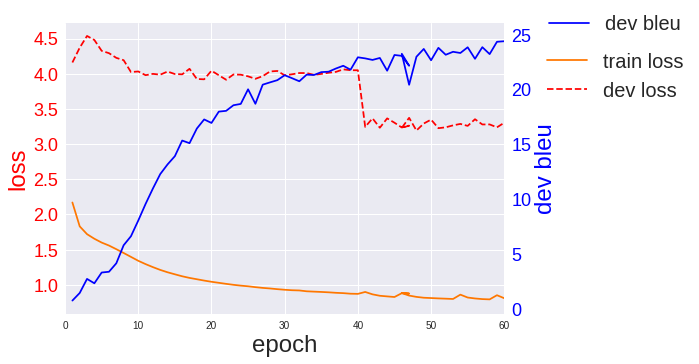

In [9]:
fig, ax1 = plt.subplots()
fig.set_size_inches(8,5)
ax1.plot(log_train[0], log_train[1], color='#ff7700')
ax1.plot(log_test[0], log_test[1], 'r--')
ax1.set_xlabel('epoch', size=24)
ax1.set_ylabel('loss', color='r', size=24)
for tl in ax1.get_yticklabels():
    tl.set_color('r')
    tl.set_fontsize(18)
plt.legend(['train loss', 'dev loss'], bbox_to_anchor=(1.45, 0.96), framealpha=0, fontsize=20)    
ax2 = ax1.twinx()
ax2.plot(log_test[0], log_test[2]*100, 'b-')
ax2.set_xlabel('iteration')
ax2.set_ylabel('dev bleu', color='b', size=24)
ax1.set_xlim(0, 60)
for tl in ax2.get_yticklabels():
    tl.set_color('b')
    tl.set_fontsize(18) 
# plt.legend(['dev bleu'], bbox_to_anchor=(1.44, 1.04), framealpha=0, fontsize=20)
plt.legend(['dev bleu'], bbox_to_anchor=(1.06, 0.9), framealpha=0, fontsize=20)
plt.grid(False)
plt.tight_layout()

In [10]:
import nltk.translate.bleu_score

In [ ]:
def display_words(m_dict, v_dict, preds, utts, dec_key, min_len=0, max_len=MAX_EN_LEN):
    es_ref = []
    en_ref = []
    for u in utts:
        es_ref.append(" ".join([w.decode() for w in m_dict[u]['es_w']]))
        if type(m_dict[u][dec_key]) == list:
            en_ref.append(" ".join([w.decode() for w in m_dict[u]['en_w']]))
        else:
            en_ref.append(" ".join([w.decode() for w in m_dict[u]['en_w'][0]]))

    en_pred = []
    join_str = ' ' if dec_key.endswith('_w') else ''

    for p in preds:
        t_str = join_str.join([v_dict['i2w'][i].decode() for i in p])
        t_str = t_str[:t_str.find('_EOS')]
        en_pred.append(t_str)

    for u, es, en, p in zip(utts, es_ref, en_ref, en_pred):
        if len(en.split(" ")) >= min_len and len(en.split(" ")) <= max_len:
            # for reference, 1st word is GO_ID, no need to display
            print("Utterance: {0:s}".format(u))
            display_pp = PrettyTable(["cat","sent"], hrules=True)
            display_pp.align = "l"
            display_pp.header = False
            display_pp.add_row(["es ref", textwrap.fill(es,50)])
            display_pp.add_row(["en ref", textwrap.fill(en,50)])
            display_pp.add_row(["en pred", textwrap.fill(p,50)])

            print(display_pp)

### Fisher dev

In [11]:
key='fisher_dev'
train=False
m_dict = map_dict[key]
v_dict = vocab_dict[dec_key]
n=len(map_dict[key])
BATCH_SIZE = 100

In [12]:
cat_speech_path = os.path.join(out_path, key)

In [13]:
print("-"*80)
print("EPOCH = {0:d}".format(last_epoch+1))
fsh_pred_sents, fsh_utts, loss = feed_model(map_dict[key],
                  b_dict=bucket_dict[key],
                  vocab_dict=vocab_dict,
                  batch_size=BATCH_SIZE,
                  x_key=enc_key,
                  y_key=dec_key,
                  train=train,
                  cat_speech_path=cat_speech_path, use_y=True)

print("{0:s} {1:s} mean loss={2:.4f}".format("*" * 10,
                                    "train" if train else "dev",
                                    loss))
print("-")
print("-"*80)

  0%|          | 0/3977 [00:00<?, ?it/s]

--------------------------------------------------------------------------------
EPOCH = 93


b=2,l=0.73,avg=2.36: 100%|██████████| 3977/3977 [03:31<00:00, 11.88it/s]   

********** dev mean loss=2.3576
-
--------------------------------------------------------------------------------


In [25]:
min_len, max_len= 0, 100

In [26]:
display_words(m_dict, v_dict, fsh_pred_sents, fsh_utts, dec_key, min_len=min_len, max_len=max_len)

min length=0, max length=100
Utterance: 20051010_212418_225_fsp-B-38
+---------+-----------------------------------------------+
| es ref  | a digamos a romper la religión de gentes a    |
|         | corromperla                                   |
+---------+-----------------------------------------------+
| en ref  | to brake religion to currupt it               |
+---------+-----------------------------------------------+
| en pred | let s see to break up in front of people from |
|         | texas                                         |
+---------+-----------------------------------------------+
Utterance: 20051018_210744_280_fsp-B-40
+---------+----------------------------------------------------+
| es ref  | así que tu sabes lo único que queremos es que sea  |
|         | saludable                                          |
+---------+----------------------------------------------------+
| en ref  | so you know the only thing we want is for it to be |
|         | healthy       

+---------+----------------------------------------------------+
| es ref  | los los los metió en el agua y los niños se        |
|         | ahogaron                                           |
+---------+----------------------------------------------------+
| en ref  | she put them in the water and the children drowned |
+---------+----------------------------------------------------+
| en pred | yeah the the ones don t have water and the lawyers |
+---------+----------------------------------------------------+
Utterance: 20051024_181110_329_fsp-B-80
+---------+------------------------------------------------+
| es ref  | como muy desesperada entonces este hacen hacen |
|         | brutalidades la verdad y es                    |
+---------+------------------------------------------------+
| en ref  | like very desperate the that they do they do   |
|         | brutal things the truth and it is              |
+---------+------------------------------------------------+
| en pred | l

+---------+--------------------------------------------------+
Utterance: 20051009_182032_217_fsp-B-58
+---------+---------------------------------------------+
| es ref  | entonces am pero mi tío está en la religión |
+---------+---------------------------------------------+
| en ref  | well but my uncle is religious              |
+---------+---------------------------------------------+
| en pred | so um but my god is full of the religion    |
+---------+---------------------------------------------+
Utterance: 20051010_212418_225_fsp-B-79
+---------+---------------------------------------------------+
| es ref  | y entonces entonces él ya pasó ese nivel y ya no  |
|         | reencarna                                         |
+---------+---------------------------------------------------+
| en ref  | and so then then he has already passed that level |
|         | and he no longer reincarnates                     |
+---------+---------------------------------------------------+
| e

Utterance: 20051016_210626_267_fsp-B-45
+---------+---------------------------------------------------+
| es ref  | sí yo lo yo tengo mi jefe mi ex - jefe lo que él  |
|         | hacía cuando le llamaban de un una de esas        |
|         | tarjetas que para rifar en la casa que sé yo      |
+---------+---------------------------------------------------+
| en ref  | yes i i have my boss my former boss the thing he  |
|         | used to do when they called from a one of those   |
|         | cards for a raffle in the house or whatever i don |
|         | t know                                            |
+---------+---------------------------------------------------+
| en pred | and i i i have my daughter my daughter what she   |
|         | was saying when they call him once a card card    |
|         | that stopped for different people that i don t    |
|         | know                                              |
+---------+---------------------------------------------------+


Utterance: 20051009_182032_217_fsp-B-117
+---------+----------------------------------------------------+
| es ref  | no vi- me vine a vivir me fui para florida con mi  |
|         | mamá y mis hermanos pequeños                       |
+---------+----------------------------------------------------+
| en ref  | no i came to live i went to florida with my mother |
|         | and my young siblings                              |
+---------+----------------------------------------------------+
| en pred | no i came to live i i m to florida with my mom and |
|         | my brother my brother my youngest                  |
+---------+----------------------------------------------------+
Utterance: 20051017_234550_276_fsp-B-93
+---------+---------------------------------------------------+
| es ref  | ¡ ay bendito te faltan un montón sí son te faltan |
|         | veintitrés                                        |
+---------+---------------------------------------------------+
| en ref  | g

Utterance: 20051019_230329_292_fsp-B-77
+---------+----------------------------------------------------+
| es ref  | tiene una voz tan dulce que a todo el mundo le     |
|         | encanta                                            |
+---------+----------------------------------------------------+
| en ref  | she has a very sweet voice that all the world love |
+---------+----------------------------------------------------+
| en pred | who is in boston i love it                         |
+---------+----------------------------------------------------+
Utterance: 20051017_234550_276_fsp-B-66
+---------+-----------------+
| es ref  | ajá ajá ajá     |
+---------+-----------------+
| en ref  | aha aha aha     |
+---------+-----------------+
| en pred | aha aha aha aha |
+---------+-----------------+
Utterance: 20051024_181110_329_fsp-A-2
+---------+------------------------------------------+
| es ref  | hola yo soy olaya en filadelfia          |
+---------+------------------------------

Utterance: 20051025_212334_337_fsp-A-93
+---------+---------------------------------------------------+
| es ref  | porque yo estba escuchando de que sí que que que  |
|         | este país este canadá necesita bastante gente ¿no |
+---------+---------------------------------------------------+
| en ref  | because i was hearing that if that that that this |
|         | country that canada needs a lot of people no      |
+---------+---------------------------------------------------+
| en pred | because i was listening to what that country that |
|         | country has been a lot of people right            |
+---------+---------------------------------------------------+
Utterance: 20051016_210626_267_fsp-A-57
+---------+----------------------------------------------------+
| es ref  | pero trato de ser un poco cortes porque sabes la   |
|         | gente que está trabajando y ganándose un sueldo    |
|         | llamando de teleoperadores llamando pues a ellos   |
|         | tampoco 

Utterance: 20051018_210744_280_fsp-A-60
+---------+---------------------------+
| es ref  | yo no sé yo no sé         |
+---------+---------------------------+
| en ref  | i don t know i don t know |
+---------+---------------------------+
| en pred | i don t know i don t know |
+---------+---------------------------+
Utterance: 20051010_212418_225_fsp-A-64
+---------+-----+
| es ref  | mhm |
+---------+-----+
| en ref  | mhm |
+---------+-----+
| en pred | mm  |
+---------+-----+
Utterance: 20051026_211309_346_fsp-B-60
+---------+---------------------+
| es ref  | sí sí sí sí         |
+---------+---------------------+
| en ref  | yeah yeah yeah yeah |
+---------+---------------------+
| en pred | yes yes yes         |
+---------+---------------------+
Utterance: 20051017_234550_276_fsp-A-134
+---------+-------------------+
| es ref  | sí es aburrido    |
+---------+-------------------+
| en ref  | yes it s boring   |
+---------+-------------------+
| en pred | yes boring boring |
+--

Utterance: 20051019_190221_288_fsp-A-61
+---------+----------------------------------------------------+
| es ref  | entonces ahí se acaba el tiempo y el y las         |
|         | vacaciones y el dinero y todo se se va en eso      |
+---------+----------------------------------------------------+
| en ref  | then there time is up and the and vacation and the |
|         | money and all goes there                           |
+---------+----------------------------------------------------+
| en pred | then there s always time and the vacation and the  |
|         | immigration and all that goes to that              |
+---------+----------------------------------------------------+
Utterance: 20051009_210519_219_fsp-A-60
+---------+---------------------------------------------------+
| es ref  | ah porque eh eh creo que establece en la biblia   |
|         | que los los pantalones los lleva el hombre algo   |
|         | así eh                                            |
+---------+---

Utterance: 20051025_212334_337_fsp-B-45
+---------+----------------------------------------------------+
| es ref  | y entonces mi esposo y yo nos decidimos movernos a |
|         | hacer de la playa                                  |
+---------+----------------------------------------------------+
| en ref  | and then my husband and i decide moving to to the  |
|         | beach                                              |
+---------+----------------------------------------------------+
| en pred | yes and then my husband i i don t neighbors we     |
|         | moved to beach                                     |
+---------+----------------------------------------------------+
Utterance: 20051019_210146_289_fsp-B-31
+---------+--------------------------------------------+
| es ref  | en canadá ahh me gustaría ir a montreal    |
+---------+--------------------------------------------+
| en ref  | en canada i would like to go to montreal   |
+---------+-------------------------------

Utterance: 20051024_180453_327_fsp-A-52
+---------+----------------------------------------------------+
| es ref  | ¿qué estaba pensando vaya que era una adolescente  |
|         | irresponsable pero pues nunca me ha pasado nada    |
+---------+----------------------------------------------------+
| en ref  | what was i thinking wow i was a very irresponsible |
|         | teenager but you know nothing happened to me       |
+---------+----------------------------------------------------+
| en pred | i was thinking thinking that it thought that where |
|         | you feel indispensable but you never ever ever     |
|         | ever                                               |
+---------+----------------------------------------------------+
Utterance: 20051018_210220_279_fsp-A-45
+---------+----------------------------------------------------+
| es ref  | yo siempre le pongo ejemplo de las personas que    |
|         | conocemos mira tu no quieres terminar ahí trabaja  |
|         

Utterance: 20051022_180817_311_fsp-B-18
+---------+-----+
| es ref  | sí  |
+---------+-----+
| en ref  | yes |
+---------+-----+
| en pred | yes |
+---------+-----+
Utterance: 20051024_180453_327_fsp-A-76
+---------+---------------------------+
| es ref  | sí es muy tranquilo       |
+---------+---------------------------+
| en ref  | yes it is very calm       |
+---------+---------------------------+
| en pred | yes what are you in chile |
+---------+---------------------------+
Utterance: 20051024_181110_329_fsp-B-16
+---------+------------+
| es ref  | ajá wow    |
+---------+------------+
| en ref  | uh huh wow |
+---------+------------+
| en pred | aha wow    |
+---------+------------+
Utterance: 20051026_211309_346_fsp-A-43
+---------+----------------------------+
| es ref  | donde están los montes ¿no |
+---------+----------------------------+
| en ref  | where the wilds are no     |
+---------+----------------------------+
| en pred | the the death right        |
+---------+--

Utterance: 20051018_210744_280_fsp-B-23
+---------+-----+
| es ref  | wow |
+---------+-----+
| en ref  | wow |
+---------+-----+
| en pred | wow |
+---------+-----+
Utterance: 20051017_234550_276_fsp-A-96
+---------+-------+
| es ref  | claro |
+---------+-------+
| en ref  | sure  |
+---------+-------+
| en pred | sure  |
+---------+-------+
Utterance: 20051018_210744_280_fsp-B-4
+---------+----------+
| es ref  | en miami |
+---------+----------+
| en ref  | in miami |
+---------+----------+
| en pred | in miami |
+---------+----------+
Utterance: 20051022_180817_311_fsp-B-52
+---------+-----+
| es ref  | sí  |
+---------+-----+
| en ref  | yes |
+---------+-----+
| en pred | yes |
+---------+-----+
Utterance: 20051017_220530_275_fsp-B-88
+---------+-----+
| es ref  | sí  |
+---------+-----+
| en ref  | yes |
+---------+-----+
| en pred | yes |
+---------+-----+
Utterance: 20051017_234550_276_fsp-B-67
+---------+-----+
| es ref  | ajá |
+---------+-----+
| en ref  | aha |
+---------

+---------+-------+
Utterance: 20051017_220530_275_fsp-A-29
+---------+--------+
| es ref  | ah ajá |
+---------+--------+
| en ref  | ah aha |
+---------+--------+
| en pred | aha    |
+---------+--------+
Utterance: 20051017_220530_275_fsp-A-74
+---------+---------------------+
| es ref  | colombiana          |
+---------+---------------------+
| en ref  | colombian           |
+---------+---------------------+
| en pred | colombian colombian |
+---------+---------------------+
Utterance: 20051024_181110_329_fsp-B-58
+---------+-----+
| es ref  | sí  |
+---------+-----+
| en ref  | yes |
+---------+-----+
| en pred | yes |
+---------+-----+
Utterance: 20051017_180712_270_fsp-B-81
+---------+-------+
| es ref  | hm mm |
+---------+-------+
| en ref  | hm mm |
+---------+-------+
| en pred | mm    |
+---------+-------+
Utterance: 20051024_181110_329_fsp-B-43
+---------+-----------+
| es ref  | sí ajá    |
+---------+-----------+
| en ref  | yes aha   |
+---------+-----------+
| en pred

Utterance: 20051019_230329_292_fsp-A-39
+---------+--------------+
| es ref  | claro ah     |
+---------+--------------+
| en ref  | ah of course |
+---------+--------------+
| en pred | sure ah      |
+---------+--------------+
Utterance: 20051026_180724_341_fsp-A-26
+---------+-------+
| es ref  | g     |
+---------+-------+
| en ref  | g     |
+---------+-------+
| en pred | hello |
+---------+-------+
Utterance: 20051017_234550_276_fsp-B-130
+---------+-------+
| es ref  | oh no |
+---------+-------+
| en ref  | oh no |
+---------+-------+
| en pred | oh no |
+---------+-------+
Utterance: 20051023_232057_325_fsp-B-64
+---------+-----------------------+
| es ref  | un poco más relajado  |
+---------+-----------------------+
| en ref  | a little more relaxed |
+---------+-----------------------+
| en pred | a little bit bit      |
+---------+-----------------------+
Utterance: 20051009_182032_217_fsp-A-124
+---------+-----+
| es ref  | sí  |
+---------+-----+
| en ref  | yes |
+----

Utterance: 20051019_210146_289_fsp-B-17
+---------+---------+
| es ref  | ay ya   |
+---------+---------+
| en ref  | ay yeah |
+---------+---------+
| en pred | oh yeah |
+---------+---------+
Utterance: 20051022_180817_311_fsp-B-90
+---------+---------------+
| es ref  | ah okay       |
+---------+---------------+
| en ref  | oh okay       |
+---------+---------------+
| en pred | ah okay i see |
+---------+---------------+
Utterance: 20051023_232057_325_fsp-B-20
+---------+-----------+
| es ref  | ¿ah sí    |
+---------+-----------+
| en ref  | ah yeah   |
+---------+-----------+
| en pred | ah really |
+---------+-----------+
Utterance: 20051024_180453_327_fsp-A-56
+---------+-----+
| es ref  | sí  |
+---------+-----+
| en ref  | yes |
+---------+-----+
| en pred | yes |
+---------+-----+
Utterance: 20051010_212418_225_fsp-B-67
+---------+----------+
| es ref  | sí claro |
+---------+----------+
| en ref  | yes sure |
+---------+----------+
| en pred | exactly  |
+---------+-------

Utterance: 20051009_182032_217_fsp-A-151
+---------+----------+
| es ref  | eh es es |
+---------+----------+
| en ref  | eh is is |
+---------+----------+
| en pred | ah eh eh |
+---------+----------+
Utterance: 20051019_210146_289_fsp-A-42
+---------+-------------------------------------+
| es ref  | ¿conoces seatle washington          |
+---------+-------------------------------------+
| en ref  | have you been to seattle washington |
+---------+-------------------------------------+
| en pred | do you meet did you meet you        |
+---------+-------------------------------------+
Utterance: 20051018_210220_279_fsp-B-21
+---------+-----------+
| es ref  | ajá ajá   |
+---------+-----------+
| en ref  | yeah yeah |
+---------+-----------+
| en pred | aha aha   |
+---------+-----------+
Utterance: 20051009_182032_217_fsp-A-92
+---------+------------------+
| es ref  | sí wow y ent-    |
+---------+------------------+
| en ref  | yes wow and the- |
+---------+------------------+
| en 

In [27]:
b, h, r = calc_bleu(m_dict, v_dict, fsh_pred_sents[:n], fsh_utts[:n], dec_key, min_len=min_len, max_len=max_len)

print("BLEU score on: {0:s} = {1:.2f}".format(key, b * 100))

print("-"*60)

all_weights=[(1.,0.,0.,0.),
             (0.,1.,0.,0.),
             (0.,0.,1.,0.),
             (0.,0.,0.,1.),
             (1./2,1./2,0.,0.),
             (1./3,1./3,1./3,0.),
             (.25,.25,.25,.25)]

100%|██████████| 3977/3977 [00:00<00:00, 40936.26it/s]

min length=0, max length=100


total utts matching length filters=3977
BLEU score on: fisher_dev = 23.89
------------------------------------------------------------


In [28]:
smooth_fun = nltk.translate.bleu_score.SmoothingFunction()

In [ ]:
print("{0:>20s} | {1:20s}".format("bleu score (0-100)", "uni-bi-tri-quad"))
for weights in all_weights:
    b = corpus_bleu(r, h, weights=weights, smoothing_function=smooth_fun.method2)
    print("{0:20.2f} | {1:20s}".format(b * 100, "-".join(map("{0:.2f}".format, weights))))

In [ ]:
_, _ = corpus_precision_recall(r, h)

### Callhome dev

In [ ]:
key='callhome_devtest'
train=False
m_dict = map_dict[key]
v_dict = vocab_dict[dec_key]
n=len(map_dict[key])
BATCH_SIZE = 100

In [ ]:
cat_speech_path = os.path.join(out_path, key)

In [ ]:
print("-"*80)
print("EPOCH = {0:d}".format(last_epoch+1))
pred_sents, utts, loss = feed_model(map_dict[key],
                  b_dict=bucket_dict[key],
                  vocab_dict=vocab_dict,
                  batch_size=BATCH_SIZE,
                  x_key=enc_key,
                  y_key=dec_key,
                  train=train,
                  cat_speech_path=cat_speech_path, use_y=True)

print("{0:s} {1:s} mean loss={2:.4f}".format("*" * 10,
                                    "train" if train else "dev",
                                    loss))
print("-")
print("-"*80)

In [ ]:
display_words(m_dict, v_dict, pred_sents[:50], utts[:50], dec_key)

In [ ]:
b, h, r = calc_bleu(m_dict, v_dict, pred_sents[:n], utts[:n], dec_key)

print("BLEU score on: {0:s} = {1:.2f}".format(key, b * 100))

print("-"*60)

all_weights=[(1.,0.,0.,0.),
             (0.,1.,0.,0.),
             (0.,0.,1.,0.),
             (0.,0.,0.,1.),
             (1./2,1./2,0.,0.),
             (1./3,1./3,1./3,0.),
             (.25,.25,.25,.25)]

In [ ]:
smooth_fun = nltk.translate.bleu_score.SmoothingFunction()

In [ ]:
print("{0:>20s} | {1:20s}".format("bleu score (0-100)", "uni-bi-tri-quad"))
for weights in all_weights:
    b = corpus_bleu(r, h, weights=weights, smoothing_function=smooth_fun.method2)
    print("{0:20.2f} | {1:20s}".format(b * 100, "-".join(map("{0:.2f}".format, weights))))

In [ ]:
_, _ = corpus_precision_recall(r, h)

### Test code

In [ ]:
# test_ref = [["ha ha lol hue".split()], ["ha ha ja ha".split()], ["ha ha ja ha".split()]]
# test_h = ["lol ja".split(), "ha he".split(), "ha ja".split()]
# _, _ = corpus_precision_recall(test_ref, test_h)